<a href="https://colab.research.google.com/github/marianaufcg/Capacitacao/blob/main/operadores2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

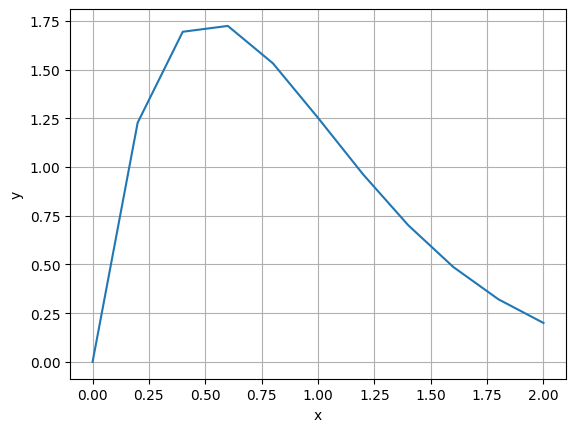

[[  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 25. -69.  50.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  25. -69.  50.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  25. -69.  50.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  25. -69.  50.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  25. -69.  50.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  25. -69.  50.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  25. -69.  50.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  25. -69.  50.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  25. -69.  50.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]]


In [5]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

n = 11                   # Número de pontos
intervalo = 2            # Intervalo em x
passo = intervalo/(n-1)  # Distância entre os pontos
ci = 0                   # Condição inicial
cf = 0.2                 # Condição final

# Matrizes de formação

main_diag = sp.eye(n, format='csr')
upper_diag = sp.eye(n, k=1, format='csr')
lower_diag = sp.eye(n, k=-1, format='csr')

Dxf = (upper_diag - main_diag) * (1/passo)  # Matriz de transformação Dx^f

Dxg = (main_diag - lower_diag) * (1/passo) # Matriz de transformação Dxg

# Definindo operador geral da transformação

operador = np.dot(Dxg, Dxf) + (5 * Dxf) + (6 * main_diag)

operador[0,:] = 0
operador[0,0] = 1
operador[n-1,:] = 0
operador[n-1,n-1] = 1

# Definindo matriz coluna

matriz_coluna = np.zeros((n, 1))
matriz_coluna[0] = ci
matriz_coluna[n-1] = cf

# Solução do sistema de matrizes

solucao = sp.linalg.spsolve(operador, matriz_coluna)

# Plotagem

x = np.linspace(0, intervalo, n)

plt.plot(x, solucao)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

print(operador.todense())
